In [1]:
import pandas as pd
import numpy as np
# pivot: column: cluster
    # rows: variables. could use average, could use count, etc.

In [2]:
data = pd.read_csv("subscribers.csv")
data.head()
data.shape

(227628, 30)

## Drop uninformative variables

In [33]:
data1 = data.copy()
data1 = data.drop(['subid','language','country','months_per_bill_period','trial_end_date','next_payment','payment_type','initial_credit_card_declined','plan_type'],axis = 1)
data1.head(10)

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,...,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,current_sub_TF,payment_period,last_payment,cancel_date,trial_completed
0,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,facebook,...,4.7343,4.5141,1/24/2020 21:44,NaN,14,True,1,2/7/2020 21:44,NaN,True
1,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,facebook,...,4.7343,4.5141,3/1/2020 15:44,0.3303,14,True,1,3/15/2020 15:44,NaN,True
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,facebook,...,4.7343,4.5141,12/7/2019 16:37,0.1101,14,False,0,NaN,NaN,True
3,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,tv,...,4.7343,4.5141,1/27/2020 16:09,0.0367,14,False,0,NaN,NaN,True
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,...,4.7343,4.5141,10/5/2019 12:57,0.0367,14,True,2,2/19/2020 12:57,NaN,True
5,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,tv,...,4.7343,4.5141,3/3/2020 20:15,0.3303,14,True,1,3/17/2020 20:15,NaN,True
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,search,...,4.7343,4.5141,2/19/2020 18:30,0.3303,14,True,1,3/4/2020 18:30,NaN,True
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,referral,...,4.7343,4.5141,3/5/2020 14:52,0.0000,14,True,1,3/19/2020 14:52,NaN,True
8,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,facebook,facebook,...,4.7343,4.5141,2/23/2020 17:50,0.6606,14,True,1,3/8/2020 17:50,NaN,True
9,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,search,facebook,...,4.7343,4.5141,1/21/2020 14:17,0.3303,14,False,0,NaN,1/27/2020 0:00,False


In [34]:
data1.columns

Index(['package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'monthly_price', 'discount_price', 'account_creation_date', 'join_fee',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'cancel_date', 'trial_completed'],
      dtype='object')

## Remove missing values

In [35]:
# Number of missing values in each column
data1.isnull().sum(axis = 0)

package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
attribution_technical                0
attribution_survey                2644
op_sys                           13375
monthly_price                        0
discount_price                       0
account_creation_date                0
join_fee                         34904
num_trial_days                       0
current_sub_TF                       0
payment_period                       0
last_payment                     95391
cancel_date                     190797
trial_completed                      0
dtype: int64

In [36]:
# Set missing threshold = 36000, ie. if less than 36000 missing values, no big deal to our giant data set. May safely remove.
data1.dropna(axis=0,subset=['package_type','intended_use','age', 'male_TF', 'attribution_survey','op_sys','join_fee'], inplace=True)
print(data1.head())
#data1.isnull().sum(axis = 0)
print(data1.shape)

  package_type  num_weekly_services_utilized preferred_genre  \
2     enhanced                           3.0        regional   
3         base                           NaN           drama   
4         base                           4.0          comedy   
6         base                           2.0          comedy   
7         base                           3.0           drama   

                  intended_use  weekly_consumption_hour  \
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   
6  access to exclusive content                20.051667   
7  access to exclusive content                34.551230   

   num_ideal_streaming_services   age male_TF attribution_technical  \
2                           2.0  25.0    True               organic   
3                           NaN  30.0   False                search   
4                           3.0  28.0   False  

## Process extreme values

In [37]:
data1.drop(data1[data1.age > 80].index, inplace=True)
data1.drop(data1[data1.age < 15].index, inplace=True)
data1.head()
data1.shape

(143680, 21)

## Export the cleaned dataframe to a new csv

In [38]:
data_cleaned = data1.copy()
data_cleaned.to_csv('subscribers_cleaned.csv', index=False)

## Convert booleans to dummies

In [39]:
# Convert booleans to dummies
# df["somecolumn"] = df["somecolumn"].astype(int)
data1['male_TF'] = data1['male_TF'].astype(int)
data1['current_sub_TF'] = data1['current_sub_TF'].astype(int)
data1['trial_completed'] = data1['trial_completed'].astype(int)
print(data1.head())

  package_type  num_weekly_services_utilized preferred_genre  \
2     enhanced                           3.0        regional   
3         base                           NaN           drama   
4         base                           4.0          comedy   
6         base                           2.0          comedy   
7         base                           3.0           drama   

                  intended_use  weekly_consumption_hour  \
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   
6  access to exclusive content                20.051667   
7  access to exclusive content                34.551230   

   num_ideal_streaming_services   age  male_TF attribution_technical  \
2                           2.0  25.0        1               organic   
3                           NaN  30.0        0                search   
4                           3.0  28.0       

In [40]:
data1.columns

Index(['package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'monthly_price', 'discount_price', 'account_creation_date', 'join_fee',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'cancel_date', 'trial_completed'],
      dtype='object')

## Convert categorical variables to dummy variables

In [41]:
data2 = pd.get_dummies(data=data1, columns=['package_type', 'preferred_genre',
                                                    'intended_use', 
                                                    'attribution_technical','attribution_survey','op_sys'])

In [22]:
#data1 = pd.concat([package_type, intended_use, attribution_technical, attribution_survey, op_sys, preferred_genre], axis = 1)

In [42]:
print(data2.columns)
print(data2.shape)
data2.head()

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'monthly_price',
       'discount_price', 'account_creation_date', 'join_fee', 'num_trial_days',
       'current_sub_TF', 'payment_period', 'last_payment', 'cancel_date',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,...,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,12/7/2019 16:37,0.1101,14,...,0,0,0,0,0,0,0,0,0,1
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,1/27/2020 16:09,0.0367,14,...,0,0,0,0,0,0,1,0,1,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,10/5/2019 12:57,0.0367,14,...,0,0,0,0,0,0,0,1,0,1
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,2/19/2020 18:30,0.3303,14,...,0,0,0,1,0,0,0,0,1,0
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,3/5/2020 14:52,0.0000,14,...,0,0,1,0,0,0,0,0,0,1


## Export the cleaned + dummified dataframe to a new csv

In [43]:
data_cleaned_dummified = data2.copy()
data_cleaned_dummified.to_csv('subscribers_cleaned_dummified.csv', index=False)

In [68]:
data1 = data2.copy()

## Dates: account creation date, cancel date, last_payment

In [71]:
### 1. Account creation date
from datetime import datetime
data1['account_creation_date']=pd.to_datetime(data1['account_creation_date'], format='%m/%d/%Y %H:%M')
data1['account_creation_month'] = pd.DatetimeIndex(data1['account_creation_date']).month
#data1['account_creation_month']
data1['account_creation_weekday'] = pd.DatetimeIndex(data1['account_creation_date']).weekday+1
#data1['account_creation_weekday']
data1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,...,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,2019-12-07 16:37:00,0.1101,14,...,0,0,0,0,0,0,0,1,12,6
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,2020-01-27 16:09:00,0.0367,14,...,0,0,0,0,1,0,1,0,1,1
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,2019-10-05 12:57:00,0.0367,14,...,0,0,0,0,0,1,0,1,10,6
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,2020-02-19 18:30:00,0.3303,14,...,0,1,0,0,0,0,1,0,2,3
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,2020-03-05 14:52:00,0.0000,14,...,1,0,0,0,0,0,0,1,3,4


In [82]:
### 2. Cancel date
from datetime import datetime
data1['cancel_date']=pd.to_datetime(data1['cancel_date'], format='%m/%d/%Y %H:%M')
data1['cancel_month'] = pd.DatetimeIndex(data1['cancel_date']).month.fillna(0.0).astype(int)
data1['cancel_weekday'] = pd.DatetimeIndex(data1['cancel_date']).weekday+1
data1['cancel_weekday'] = data1['cancel_weekday'].fillna(0.0).astype(int)
data1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,...,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,2019-12-07 16:37:00,0.1101,14,...,0,0,0,0,0,1,12,6,0,0
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,2020-01-27 16:09:00,0.0367,14,...,0,0,1,0,1,0,1,1,0,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,2019-10-05 12:57:00,0.0367,14,...,0,0,0,1,0,1,10,6,0,0
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,2020-02-19 18:30:00,0.3303,14,...,0,0,0,0,1,0,2,3,0,0
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,2020-03-05 14:52:00,0.0000,14,...,0,0,0,0,0,1,3,4,0,0
8,NaN,25.851492,NaN,73.0,0,4.7343,4.5141,2020-02-23 17:50:00,0.6606,14,...,0,0,0,0,0,1,2,7,0,0
9,3.0,28.751405,2.0,71.0,0,4.7343,4.5141,2020-01-21 14:17:00,0.3303,14,...,0,0,0,0,1,0,1,2,1,1
11,NaN,37.451142,NaN,24.0,1,4.7343,4.5141,2019-12-01 07:29:00,0.3303,14,...,0,0,0,0,0,1,12,7,0,0
12,2.0,28.751405,2.0,57.0,0,4.7343,4.5141,2019-09-28 20:50:00,0.0367,14,...,0,0,1,0,0,1,9,6,0,0
13,3.0,33.101274,2.0,54.0,0,4.7343,4.5141,2019-08-16 23:56:00,0.0367,14,...,0,0,0,0,0,1,8,5,0,0


In [84]:
### 3. Last payment date
from datetime import datetime
data1['last_payment']=pd.to_datetime(data1['last_payment'], format='%m/%d/%Y %H:%M')
data1['last_payment_month'] = pd.DatetimeIndex(data1['last_payment']).month.fillna(0.0).astype(int)
data1['last_payment_weekday'] = pd.DatetimeIndex(data1['last_payment']).weekday+1
data1['last_payment_weekday'] = data1['last_payment_weekday'].fillna(0.0).astype(int)
data1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,...,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,2019-12-07 16:37:00,0.1101,14,...,0,0,0,1,12,6,0,0,0,0
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,2020-01-27 16:09:00,0.0367,14,...,1,0,1,0,1,1,0,0,0,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,2019-10-05 12:57:00,0.0367,14,...,0,1,0,1,10,6,0,0,2,3
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,2020-02-19 18:30:00,0.3303,14,...,0,0,1,0,2,3,0,0,3,3
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,2020-03-05 14:52:00,0.0000,14,...,0,0,0,1,3,4,0,0,3,4
8,NaN,25.851492,NaN,73.0,0,4.7343,4.5141,2020-02-23 17:50:00,0.6606,14,...,0,0,0,1,2,7,0,0,3,7
9,3.0,28.751405,2.0,71.0,0,4.7343,4.5141,2020-01-21 14:17:00,0.3303,14,...,0,0,1,0,1,2,1,1,0,0
11,NaN,37.451142,NaN,24.0,1,4.7343,4.5141,2019-12-01 07:29:00,0.3303,14,...,0,0,0,1,12,7,0,0,12,7
12,2.0,28.751405,2.0,57.0,0,4.7343,4.5141,2019-09-28 20:50:00,0.0367,14,...,1,0,0,1,9,6,0,0,0,0
13,3.0,33.101274,2.0,54.0,0,4.7343,4.5141,2019-08-16 23:56:00,0.0367,14,...,0,0,0,1,8,5,0,0,0,0


## Export the parsed-date version to a new csv

In [88]:
subscribers_clean_dumm_date = data1.copy()
subscribers_clean_dumm_date.to_csv('subscribers_clean_dumm_date.csv', index=False)

## 1. Customer Segmentation using K-means Clustering

## normalize data

In [89]:
df = data1.copy()
#df = data_cleaned.copy()
# Drop originally formatted date columns.
df = df.drop('account_creation_date',axis = 1) # drop column
df = df.drop('cancel_date',axis = 1) # drop column
df = df.drop('last_payment',axis = 1) # drop column

# for pivot table
df_cleaned = data_cleaned.copy()

df.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'monthly_price',
       'discount_price', 'join_fee', 'num_trial_days', 'current_sub_TF',
       'payment_period', 'trial_completed', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent g

In [90]:
#df.isnull().sum(axis = 0)
df1 = df.copy()
df1.dropna(axis=0, inplace=True)
df1.drop('trial_completed',axis=1)
df1.shape

(92291, 83)

In [92]:
df1.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'monthly_price',
       'discount_price', 'join_fee', 'num_trial_days', 'current_sub_TF',
       'payment_period', 'trial_completed', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent g

In [93]:
from sklearn.preprocessing import MinMaxScaler 

feature_x = [tag for tag in df1.columns if tag not in ['subid']] # all features in the excel file except CID (column ID)
#print('feature:\n', feature_x)
X = df1[feature_x].values
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X)  # apply min_max scale
X_recon = minmaxscaler.inverse_transform(X_scaled)  # apply the inverse of min_max scale


In [94]:
from sklearn.cluster import KMeans
SSE = []
for k in range(1,13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

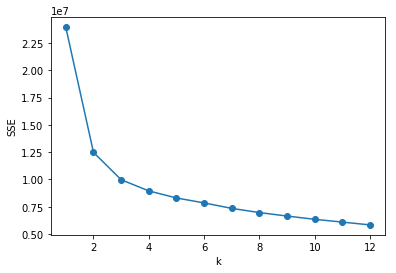

In [96]:
import matplotlib.pyplot as plt
X = range(1,13)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

### Elbow point: 4 clusters

In [97]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(df1)
#print(kmeans.cluster_centers_)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [99]:
df2 = df1.copy()
#df2 = df2.as_matrix()
y_kmeans = kmeans.fit_predict(df2)

#plt.scatter(df2[y_kmeans==0, 0], df2[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(df2[y_kmeans==1, 0], df2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(df2[y_kmeans==2, 0], df2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(df2[y_kmeans==3, 0], df2[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(df2[y_kmeans==4, 0], df2[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
#plt.title('Clusters of Customers')
#plt.show()

In [101]:
df1['cluster'] = y_kmeans
df1.head(20)

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,join_fee,num_trial_days,current_sub_TF,...,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday,cluster
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,0.1101,14,0,...,0,0,1,12,6,0,0,0,0,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,0.0367,14,1,...,1,0,1,10,6,0,0,2,3,0
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,0.3303,14,1,...,0,1,0,2,3,0,0,3,3,2
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,0.0000,14,1,...,0,0,1,3,4,0,0,3,4,0
9,3.0,28.751405,2.0,71.0,0,4.7343,4.5141,0.3303,14,0,...,0,1,0,1,2,1,1,0,0,2
12,2.0,28.751405,2.0,57.0,0,4.7343,4.5141,0.0367,14,0,...,0,0,1,9,6,0,0,0,0,1
13,3.0,33.101274,2.0,54.0,0,4.7343,4.5141,0.0367,14,0,...,0,0,1,8,5,0,0,0,0,1
17,2.0,27.301448,2.0,24.0,0,4.7343,4.5141,0.0367,14,0,...,0,1,0,10,3,0,0,0,0,0
20,2.0,27.301448,2.0,26.0,0,4.7343,4.5141,0.0367,14,1,...,0,0,1,11,1,0,0,3,3,0
21,4.0,22.951579,2.0,65.0,0,4.7343,4.5141,0.3303,14,1,...,0,0,1,3,2,0,0,3,2,2


## Cluster Breakdown

In [107]:

print('Number of people under cluster 0:', df1['cluster'][df1['cluster']==0].count())
print('Number of people under cluster 1:', df1['cluster'][df1['cluster']==1].count())
print('Number of people under cluster 2:', df1['cluster'][df1['cluster']==2].count())
print('Number of people under cluster 3:', df1['cluster'][df1['cluster']==3].count())

Number of people under cluster 0: 19894
Number of people under cluster 1: 27853
Number of people under cluster 2: 17382
Number of people under cluster 3: 27162


### export df1 (cluster result updated to a new csv)

In [109]:
subscribers_clustered = df1.copy()
subscribers_clustered.to_csv('subscribers_clustered.csv', index=False)

In [310]:
len(df1.columns)

84

## 2. Channel Allocation

In [293]:
import pandas as pd

channel_df_raw = pd.read_csv('channel_spend_graduate.csv')
channel_df = channel_df_raw.copy()
channel_df.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [294]:
# subscribers file to be paired
subs_df = data.copy()

In [295]:
from datetime import datetime
subs_df['account_creation_date']=pd.to_datetime(subs_df['account_creation_date'], format='%m/%d/%Y %H:%M')
subs_df['account_creation_year'] = pd.DatetimeIndex(subs_df['account_creation_date']).year
subs_df['account_creation_month'] = pd.DatetimeIndex(subs_df['account_creation_date']).month

In [267]:
#subs_df['subid'] = range(1, len(subs_df) + 1)

In [296]:
### Parse dates
from datetime import datetime
# 201907

channel_date = list(channel_df.date)
channel_name = list(channel_df.channel)
channel_year = []
channel_month = []

for i in channel_date:
    channel_year.append(str(i)[0:4]) # year
    channel_month.append(str(i)[4:]) # month
    
channel_df['month'] = pd.Series(channel_month).astype(int)
channel_df['year'] = pd.Series(channel_year).astype(int)

print(channel_df.head())

    channel    date  spend_AED  month  year
0      bing  201907        400      7  2019
1   display  201907         12      7  2019
2  facebook  201907       9000      7  2019
3    search  201907      13000      7  2019
4   youtube  201907         90      7  2019


In [297]:
channels = ['bing','display','facebook','search','youtube']

jul2019 = {}
aug2019 = {}
sept2019 = {}
oct2019 = {}
nov2019= {}
dec2019 = {}
jan2020 = {}
feb2020 = {}

for i in channels:
    jul2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==7) & (subs_df['account_creation_year'] == 2019)].count()
    aug2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==8) & (subs_df['account_creation_year'] == 2019)].count()
    sept2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==9) & (subs_df['account_creation_year'] == 2019)].count()
    oct2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==10) & (subs_df['account_creation_year'] == 2019)].count()
    nov2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==11) & (subs_df['account_creation_year'] == 2019)].count()
    dec2019[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==12) & (subs_df['account_creation_year'] == 2019)].count()
    jan2020[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==1) & (subs_df['account_creation_year'] == 2020)].count()
    feb2020[i] = subs_df['subid'][(subs_df['attribution_technical']==i) & (subs_df['account_creation_month']==2) & (subs_df['account_creation_year'] == 2020)].count()
    

In [298]:
bing = ['bing', jul2019['bing'],aug2019['bing'],sept2019['bing'],oct2019['bing'],nov2019['bing'],dec2019['bing'],jan2020['bing'],feb2020['bing']]
display = ['display', jul2019['display'],aug2019['display'],sept2019['display'],oct2019['display'],nov2019['display'],dec2019['display'],jan2020['display'],feb2020['display']]
facebook = ['facebook', jul2019['facebook'],aug2019['facebook'],sept2019['facebook'],oct2019['facebook'],nov2019['facebook'],dec2019['facebook'],jan2020['facebook'],feb2020['facebook']]
search = ['search', jul2019['search'],aug2019['search'],sept2019['search'],oct2019['search'],nov2019['search'],dec2019['search'],jan2020['search'],feb2020['search']]
youtube = ['youtube', jul2019['youtube'],aug2019['youtube'],sept2019['youtube'],oct2019['youtube'],nov2019['youtube'],dec2019['youtube'],jan2020['youtube'],feb2020['youtube']]

print(bing,display,facebook,search,youtube)

['bing', 120, 71, 84, 86, 103, 28, 172, 303] ['display', 44, 74, 12, 50, 90, 112, 536, 341] ['facebook', 10011, 9855, 6129, 9489, 12995, 9288, 6289, 7988] ['search', 1328, 1939, 1852, 2333, 2510, 3770, 4073, 4300] ['youtube', 8, 15, 2, 11, 47, 76, 370, 205]


In [299]:
names = channel_df['channel'].tolist()
months = channel_df['month'].tolist()
years = channel_df['year'].tolist()

In [300]:
sales = []
channels = ['bing','display','facebook','search','youtube']
channels_list = [bing,display,facebook,search,youtube]
months_index = [7,8,9,10,11,12,1,2]

for i in range (0, len(names)):
    name = names[i]
    month = months[i]
    
    channel_index = channels.index(name)
    month_index = months_index.index(month)
    
    sales_figure = channels_list[channel_index][month_index+1]
    #print(sales_figure)
    sales.append(sales_figure)

In [301]:
channel_df['sales'] = pd.Series(sales).astype(int)
channel_df.head(10)

,channel,date,spend_AED,month,year,sales
0,bing,201907,400,7,2019,120
1,display,201907,12,7,2019,44
2,facebook,201907,9000,7,2019,10011
3,search,201907,13000,7,2019,1328
4,youtube,201907,90,7,2019,8
5,bing,201908,900,8,2019,71
6,display,201908,20,8,2019,74
7,facebook,201908,13000,8,2019,9855
8,search,201908,18500,8,2019,1939
9,youtube,201908,180,8,2019,15


In [302]:
channel_df_sorted = channel_df.groupby(['channel','spend_AED'])
channel_df_sorted.first()

date  month  year  sales
channel  spend_AED                            
bing     300        201912     12  2019     28
         400        201907      7  2019    120
         900        201908      8  2019     71
         1000       201909      9  2019     84
         1100       201910     10  2019     86
         1300       201911     11  2019    103
         2100       202001      1  2020    172
         3700       202002      2  2020    303
display  12         201907      7  2019     44
         13         201909      9  2019     12
         19         201910     10  2019     50
         20         201908      8  2019     74
         29         201911     11  2019     90
         31         201912     12  2019    112
         94         202002      2  2020    341
         148        202001      1  2020    536
facebook 9000       201907      7  2019  10011
         10500      201909      9  2019   6129
         11000      202001      1  2020   6289
         13000      201908      8  2019   9855
         14000      202002      2  2020   7988
         16000      201912     12  2019   9288
         17000      201910     10  2019   9489
         23000      201911     11  2019  12995
search   13000      201907      7  2019   1328
         18500      201908      8  2019   1939
         19000      201909      9  2019   1852
         24000      201910     10  2019   2333
         25000      201911     11  2019   2510
         38000      201912     12  2019   3770
         41000      202001      1  2020   4073
         44000      202002      2  2020   4300
youtube  90         201907      7  2019      8
         100        201909      9  2019      2
         130        201910     10  2019     11
         180        201908      8  2019     15
         550        201911     11  2019     47
         900        201912     12  2019     76
         2420       202002      2  2020    205
         4360       202001      1  2020    370

In [303]:
bing_ = channel_df.groupby('channel').get_group('bing')
bing_.to_csv('bing_.csv', index=False)
display_ = channel_df.groupby('channel').get_group('display')
display_.to_csv('display_.csv', index=False)
facebook_ = channel_df.groupby('channel').get_group('facebook')
facebook_.to_csv('facebook_.csv', index=False)
search_ = channel_df.groupby('channel').get_group('search')
search_.to_csv('search_.csv', index=False)
youtube_ = channel_df.groupby('channel').get_group('youtube')
youtube_.to_csv('youtube_.csv', index=False)

In [304]:
channels_marginal_cac = pd.read_csv('channels_marginal_cac.csv')
channels_marginal_cac.head()

,channel,date,spend_AED,month,year,sales,marginal_cac
0,bing,201907,400,7,2019,120,3.333333
1,bing,201908,900,8,2019,71,-10.204082
2,bing,201909,1000,9,2019,84,7.692308
3,bing,201910,1100,10,2019,86,50.000000
4,bing,201911,1300,11,2019,103,11.764706


## Churn: 

In [205]:
churn_df = subscribers_clean_dumm_date.copy()

In [206]:
churn_df.columns
churn_df.shape

(143680, 86)

### Remove people under trial (payment=0 & current_sub_TF = true & cancel_date=null). Because we don't know whether they will churn or not in the future.

In [207]:
churn_df1 = churn_df.copy()
churn_df1 = churn_df1.drop(churn_df1[(churn_df1['payment_period'] == 0) & (churn_df1['current_sub_TF'] == 1) & (churn_df1['cancel_date']).isnull()].index)
churn_df1.shape

(137781, 86)

In [208]:
#churn_df1.head()

# Date columns are irrelevant except creation date and cancel date.

# Remove last payment column
churn_df1 = churn_df.drop('last_payment',axis = 1) # drop column
#churn_df1 = churn_df.drop('cancel_date',axis = 1) # drop column

### 1. Account creation date
from datetime import datetime
churn_df1['account_creation_date']=pd.to_datetime(churn_df1['account_creation_date'], format='%m/%d/%Y %H:%M')
churn_df1['account_creation_month'] = pd.DatetimeIndex(churn_df1['account_creation_date']).month
#data1['account_creation_month']
churn_df1['account_creation_weekday'] = pd.DatetimeIndex(churn_df1['account_creation_date']).weekday+1
#data1['account_creation_weekday']
churn_df1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,...,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,2019-12-07 16:37:00,0.1101,14,...,0,0,0,1,12,6,0,0,0,0
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,2020-01-27 16:09:00,0.0367,14,...,1,0,1,0,1,1,0,0,0,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,2019-10-05 12:57:00,0.0367,14,...,0,1,0,1,10,6,0,0,2,3
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,2020-02-19 18:30:00,0.3303,14,...,0,0,1,0,2,3,0,0,3,3
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,2020-03-05 14:52:00,0.0000,14,...,0,0,0,1,3,4,0,0,3,4


In [209]:
churn_df1 = churn_df1.drop('account_creation_date', axis = 1) 
churn_df1['churn'] = 0
churn_df1.head()
print(churn_df1.shape)

(143680, 85)


In [210]:
# 2. Churn type 1: has made payments before, but now have canceled and no longer have access to content
churn_df1.loc[(churn_df1['payment_period'] > 0) & (churn_df1['cancel_date'].isnull()==False) & (churn_df1['current_sub_TF'] == 0), 'churn'] = 1
churn_df1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,join_fee,num_trial_days,current_sub_TF,...,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday,churn
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,0.1101,14,0,...,0,0,1,12,6,0,0,0,0,0
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,0.0367,14,0,...,0,1,0,1,1,0,0,0,0,0
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,0.0367,14,1,...,1,0,1,10,6,0,0,2,3,0
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,0.3303,14,1,...,0,1,0,2,3,0,0,3,3,0
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,0.0000,14,1,...,0,0,1,3,4,0,0,3,4,0


In [211]:
# 2. Churn type 2: haven't made any payments but trial completed and have no access to content
    # ie. left after trial
churn_df1.loc[(churn_df1['payment_period'] == 0) & (churn_df1['trial_completed'] == 1) & (churn_df1['current_sub_TF'] == 0), 'churn'] = 1
churn_df1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,join_fee,num_trial_days,current_sub_TF,...,attribution_survey_youtube,op_sys_Android,op_sys_iOS,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday,churn
2,3.0,36.001186,2.0,25.0,1,4.7343,4.5141,0.1101,14,0,...,0,0,1,12,6,0,0,0,0,1
3,NaN,20.051667,NaN,30.0,0,4.7343,4.5141,0.0367,14,0,...,0,1,0,1,1,0,0,0,0,1
4,4.0,22.951579,3.0,28.0,0,4.7343,4.5141,0.0367,14,1,...,1,0,1,10,6,0,0,2,3,0
6,2.0,20.051667,2.0,61.0,0,4.7343,4.5141,0.3303,14,1,...,0,1,0,2,3,0,0,3,3,0
7,3.0,34.551230,2.0,23.0,0,4.7343,4.5141,0.0000,14,1,...,0,0,1,3,4,0,0,3,4,0


In [ ]:
# 3. Not-churn type 1: payment_period > 0 (has made payments) & No cancel date
#churn_df1.loc[churn_df1['payment_period'] > 0 & churn_df1['cancel_date'].isnull(), 'churn'] = 0
#churn_df1.head()

In [ ]:
# 3. Not-churn type 2: payment_period = 0 (hasn't made any payments) & No cancel date
#churn_df1.loc[churn_df1['payment_period'] == 0 & churn_df1['cancel_date'].isnull(), 'churn'] = 0
#churn_df1.head()

In [212]:
print(churn_df1['churn'][churn_df1['churn'] == 1].count())
#print(churns)
print(churn_df1['churn'][churn_df1['churn'] == 0].count())
#print(not_churns)

36134
107546


In [ ]:
churn_df1.columns

### Remove irrelevant columns

In [220]:
churn_df1.columns
#churn_df1 = churn_df1.drop('cancel_date',axis = 1) # drop column
#churn_df1 = churn_df1.drop('monthly_price',axis = 1) # drop column
#churn_df1 = churn_df1.drop('payment_period',axis = 1) # drop column
#churn_df1 = churn_df1.drop('current_sub_TF', axis = 1)
#churn_df1 = churn_df1.drop('trial_completed', axis = 1)
#churn_df1 = churn_df1.drop('current_sub_TF', axis = 1)
churn_df1 = churn_df1.drop('cancel_weekday', axis = 1)
churn_df1 = churn_df1.drop('preferred_genre_drama', axis = 1)
churn_df1 = churn_df1.drop('package_type_enhanced', axis = 1)
churn_df1 = churn_df1.drop('intended_use_access to exclusive content', axis = 1)
churn_df1 = churn_df1.drop('op_sys_Android', axis = 1)

In [221]:
churn_df1.dropna(inplace = True)
churn_df1.shape

(92291, 75)

## Logistic Regression

In [222]:
corr_matrix = churn_df1.corr()
#print(corr_matrix)

In [223]:
# correlation filter at 0.6
correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            corr = abs(corr_matrix.iloc[i, j])
            correlated_features.append([colname1,colname2,corr])
print(len(correlated_features))
print(correlated_features)

0
[]


In [225]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [226]:
x = churn_df1.loc[:, churn_df1.columns != 'churn']
y = churn_df1['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

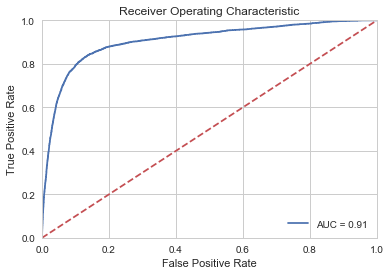

<Figure size 7200x7200 with 0 Axes>

In [314]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics as metrics
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# training and testing
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#running the model
logistic_regression= LogisticRegression(max_iter=200000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


probs = logistic_regression.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(100,100))
plt.show()

In [322]:
y_pred1=logistic_regression.predict_proba(x)[:,1]

In [323]:
churn_df1["prob"] = y_pred1

In [324]:
churn_df1.to_csv("Revenue_Lift.csv")

In [291]:
print(logistic_regression.fit(X_train,y_train).coef_, logistic_regression.fit(X_train,y_train).intercept_)
print(X_train.columns)

[[-1.02769518 -0.03111058  0.01710162  0.03070614  0.8144598   0.48701489
  -1.04478256 -0.14364725  0.44838646  1.12312954 -0.94213511  0.01284281
   0.67884588 -0.03006464  0.54527827  1.13165327  1.40681651  0.92206408
   1.70367898  0.07255391 -0.17241241  0.03168354  0.26402025 -0.44626193
   0.17959425  0.06861861  0.00556141  0.10430057 -0.03742763  0.22700841
   0.05784217 -0.21660485  0.29051022  0.06162072  0.18058343 -0.30928714
  -0.07933538  0.0219649  -0.13255141 -0.20506585 -0.26646067  0.04921838
   0.23892151  0.02925105 -0.29697015  0.94434554 -0.11941322 -0.01951004
  -0.01427567  0.12401825 -0.35870809 -0.21503929  0.04596586 -0.30740473
   0.28061745  0.8928596  -0.30749689 -0.04946428 -0.21102146 -0.03857243
  -0.02333141  0.05352122 -1.54102751 -0.09222519  0.30412005  0.11853142
   1.04826686 -0.18359907  0.04346785  0.06886564  0.10032659 -0.20545401
   0.07229221 -0.5795628 ]] [-0.00820979]
Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
    